# <span style="color:red"> Numerical Simulation 5 </span>

## Exercise 5.1

#### <span style="color:black"> Objective </span>

The focus of the excerise was to implent and test the metropolis algorithm. To do that we sampled the probability distribution of the $1s$ and $2p$ orbital of an hydrogen atom. In particular we were interested in $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$.


#### <span style="color:black"> Lenght scale and probability distribution </span>

In order to avoid overflow or underflow it was better using the Bhor radius ($a_0=4\pi\epsilon_0\hbar^2/m_e e^2$) as unit for the distances, rescaling $r=r/a_0$ and consequently renormalizing the wave functions. After squared the wave function the probability distibutions for the ground state (1s) and the first excited state (2p) of hydrogen will be (in Cartesian Coordinates): $$|\Psi_{1,0,0}(x,y,z)|^2=
\frac{1}{\pi} e^{-2 \sqrt{x^2+y^2+z^2}} $$  $$|\Psi_{2,1,0}(x,y,z)|^2=\frac{1}{32 \pi} z^2 e^{-\sqrt{x^2+y^2+z^2}}$$ and the predicted results become: $$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5
$$

#### <span style="color:black"> Implementation </span>

Pushed forward by idea of transportability of the code I built a c++ class named $Metropolis$ which implement the metropolis algorithm. The structure of the class is the following:
- it takes in input the value of the step, a vector rappresenting starting position, a pointer to a random class and a pointer to a basedistribution class which will be discussed below
- two methods for changing delta and the distribution
- two methods that make steps by uniform move and gaussian move as presented during the lesson, this two off course are not general and for an ideal different code they need to be modified
- two methods that make the equilibration taking in input the number of equilibration step
- two methods which return the acceptance and the position (coordinate by coordinate)

The $basedistribution$ class is a "virtual class" that give me the possibily to build any "son" distribution which will be passed to metropolis class. In this way I don't need to change the inside of metropolis class but still having the possiblity to use the class for every distribution of choiche. For this exercise I built two different son class: $groundstate$ and $firstexcited$ which as the name suggest are the distribution of the ground state and first excited state.

#### <span style="color:black"> Making of the simulation  </span>

The metropolis algorithm was tested with two different transition probability $T(\vec{x}|\vec{y})$, the first one was the uniform distribution while the second the normal distribution. Both of them require different step lenght $\Delta$ so as to accomplish the empirical law of 50, after some try I've found that a good $\Delta$ where:

- 1.25 for $1s$ with uniform matrix
- 0.65 for $1s$ with normal matrix
- 3.25 for $2p$ with uniform matrix
- 1.85 for $2p$ with normal matrix

For uniform distribution $\Delta$ rappresent the extrema of the interval $[-\Delta,\Delta]$ and for normal distribution we have $\Delta=\sigma$.

Another important point of the simulation was the choiche of starting point. If it would be choosed too far from the area of interest the equilibration could take very long time. Furthermore in this situation the origin is a singular point at least for $2p$ where the angular momentum avoid the electron to fall on the nucleus. Again, after some try, I decided $x_0=(2,2,2)$ for $1s$ and $x_0=(4,4,4)$ for $2p$. After this choice I made different attempt for equilibrating the system, I printed the istantaneous value of the radius, checked that they weren't oscillating too much and checked if the final result improved. The final choiche for the equilibration were:

- $n_{eq}=250$ for the uniform matrix for 1s
- $n_{eq}=300$ for the normal matrix for 1s
- $n_{eq}=300$ for the uniform matrix for 2p
- $n_{eq}=350$ for the normal matrix for 2p

For the statistics in the case of Metropolis it is necessary to use blocking, method, because the points are correlated. It is important to make a correct choice of the number of blocks in order to limit the correlation between blocks. I set up $M=10^6$ and $N=100$.

#### <span style="color:black"> Result </span>

The plots showed below make clear a good compatiblity with expected result in all case. There isn't significative difference in the result obtained with uniform distribution and normal distribution althought the necessary parameters were different.

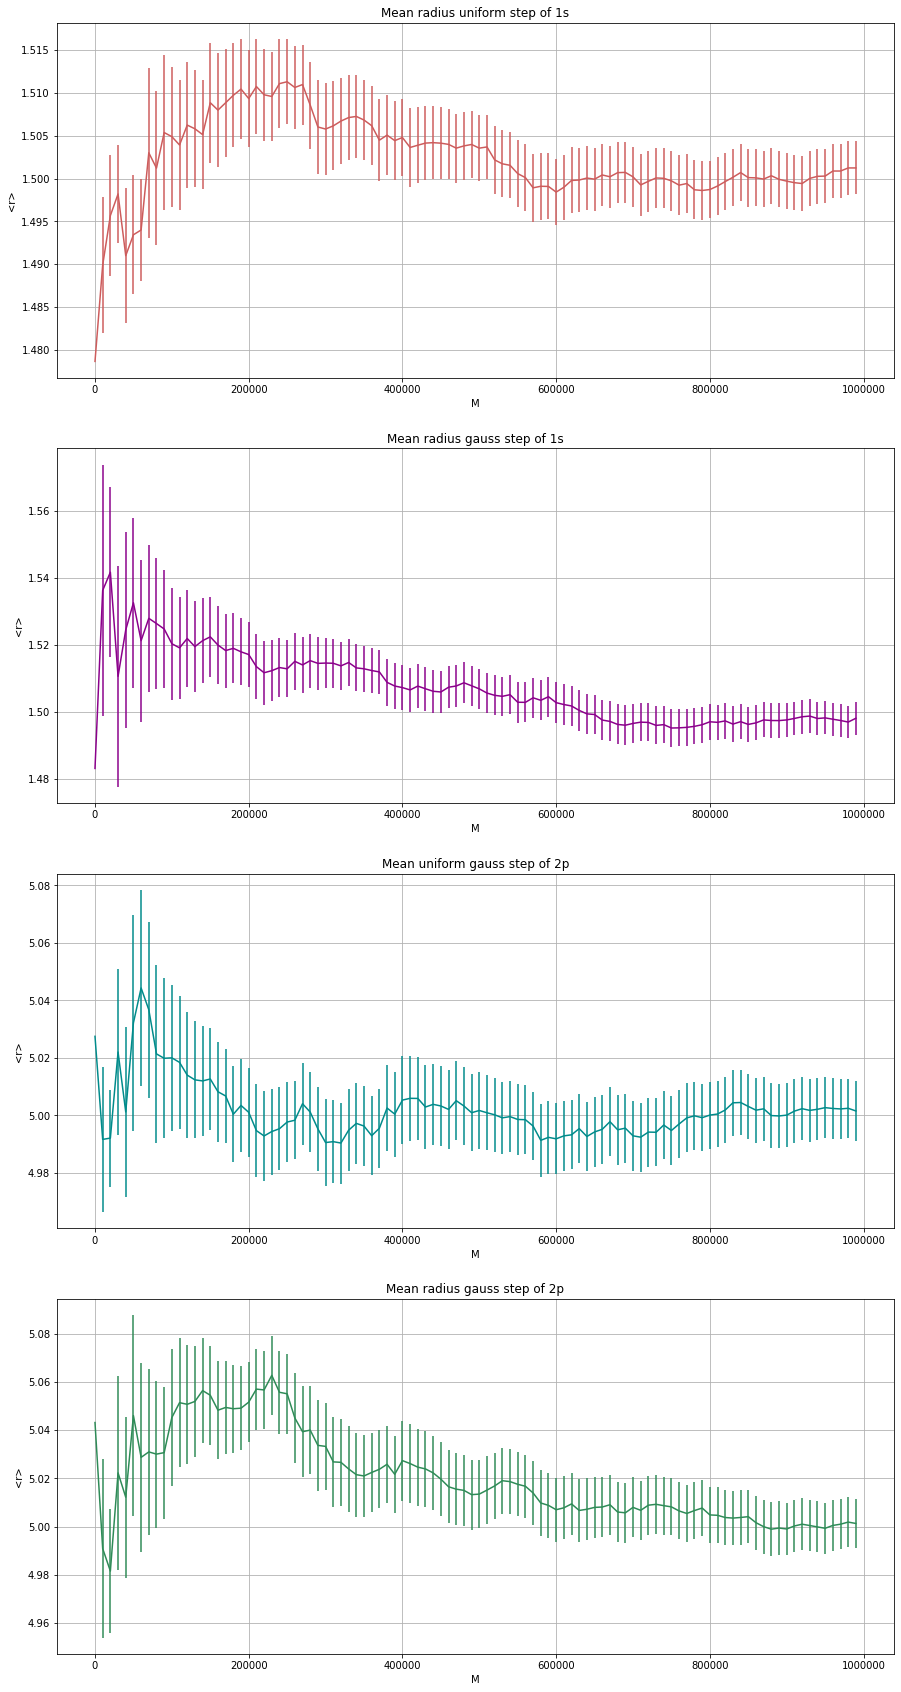

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(100)
x*=10000

gs_u, errgs_u =np.loadtxt("GroundStateU.dat", unpack=True)
gs_g, errgs_g =np.loadtxt("GroundStateG.dat", unpack=True)
p2_u, err2p_u =np.loadtxt("FirstExcitedU.dat", unpack=True)
p2_g, err2p_g =np.loadtxt("FirstExcitedG.dat", unpack=True)


fig=plt.figure(figsize=(15,30))

plt.subplot(411)
plt.errorbar(x, gs_u, yerr=errgs_u, color="indianred")
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Mean radius uniform step of 1s")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, gs_g, yerr=errgs_g, color="darkmagenta")
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Mean radius gauss step of 1s")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, p2_u, yerr=err2p_u, color="darkcyan", label="Total energy")
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Mean uniform gauss step of 2p")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, p2_g, yerr=err2p_g, color="seagreen", label="Temperature")
plt.xlabel('M')
plt.ylabel('<r>')
plt.title("Mean radius gauss step of 2p")
plt.grid(True)